In [56]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import utills
%matplotlib inline


In [57]:
np.random.seed(0)

m = 1_000
split_train = int(m * 0.7)
split_val = int(m * 0.15 + split_train)
split_test = int(m * 0.15 + split_val)

X, y = datasets.make_moons(
    n_samples=m, 
    noise=0.1, 
    random_state=0
)

X_train, y_train = X[:split_train], y[:split_train]
X_val, y_val = X[split_train:split_val], y[split_train:split_val]
X_test, y_test = X[split_val:split_test], y[split_val:split_test]

In [58]:
print('Splits:', split_train, split_val, split_test)
print('Lenghths:', len(X_train), len(X_val), len(X_test))

Splits: 700 850 1000
Lenghths: 700 150 150


((1000,), (1000, 2))

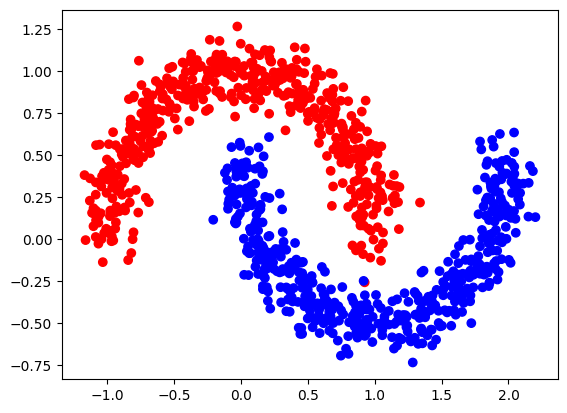

In [59]:
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

In [60]:
X_train[0], y_train[0]

(array([2.04271531, 0.51812416]), 1)

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [62]:
#tf.get_logger().setLevel('ERROR')

In [63]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

In [64]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
 dense_9 (Dense)             (None, 8)                 24        
                                                                 
 dense_10 (Dense)            (None, 10)                90        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [66]:
epochs = 1_000

In [67]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 17.64 seconds.


In [68]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 905us/step - loss: 0.6341 - binary_accuracy: 0.7714


[0.6340764164924622, 0.7714285850524902]

In [69]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1ms/step - loss: 0.6395 - binary_accuracy: 0.7400


[0.639451801776886, 0.7400000095367432]

32/32 [==============================] - 0s 600us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

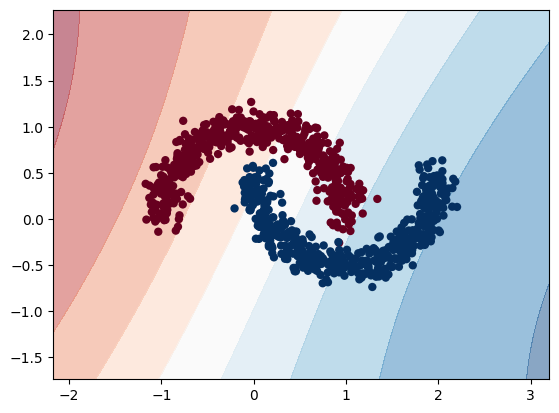

In [70]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

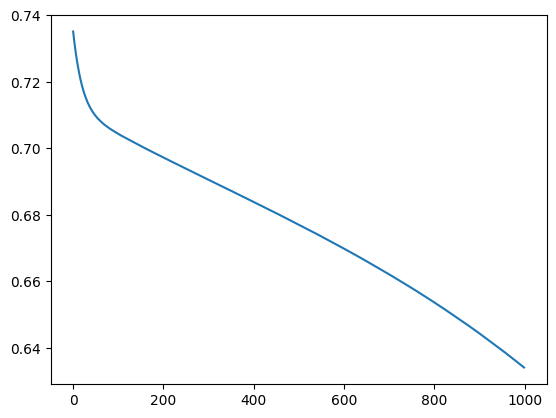

In [71]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [72]:
epochs = 3_000

In [73]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 47.82 seconds.


In [74]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 810us/step - loss: 0.3043 - binary_accuracy: 0.8571


[0.3042968809604645, 0.8571428656578064]

In [75]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1ms/step - loss: 0.3172 - binary_accuracy: 0.8533


[0.3171602487564087, 0.8533333539962769]

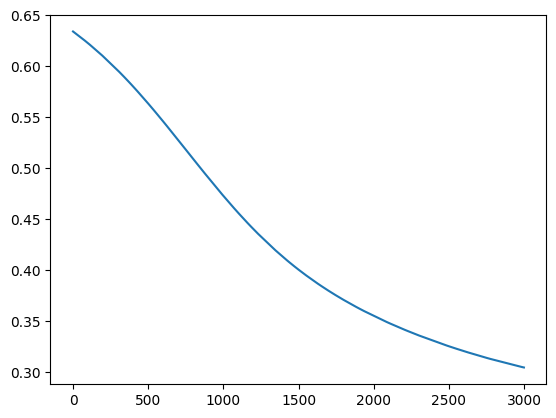

In [76]:
plt.plot([i for i in range(epochs)], history.history['loss'])

32/32 [==============================] - 0s 839us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

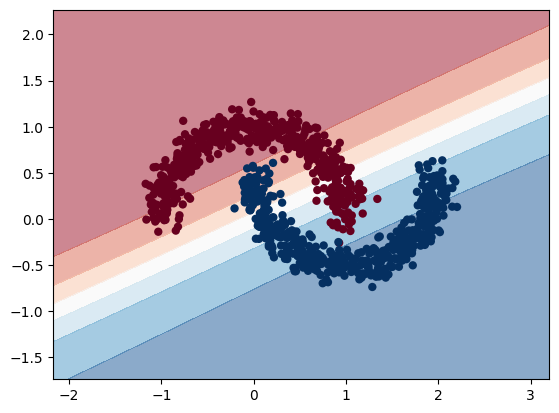

In [77]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

In [78]:
del model
del history

In [79]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [80]:
epochs = 1_000

In [81]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [82]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 16.78 seconds.


In [83]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 667us/step - loss: 0.2386 - binary_accuracy: 0.8829


[0.23863635957241058, 0.8828571438789368]

In [84]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1ms/step - loss: 0.2556 - binary_accuracy: 0.8667


[0.2555641829967499, 0.8666666746139526]

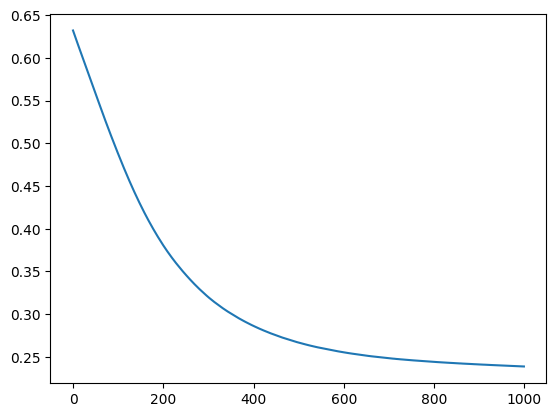

In [85]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [86]:
del model
del history

In [87]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [88]:
epochs = 1_000

In [89]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [90]:
with utills.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 17.52 seconds.


In [91]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 762us/step - loss: 0.0023 - binary_accuracy: 0.9986


[0.0023254691623151302, 0.9985714554786682]

In [92]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1ms/step - loss: 1.6123e-04 - binary_accuracy: 1.0000


[0.00016122568922583014, 1.0]

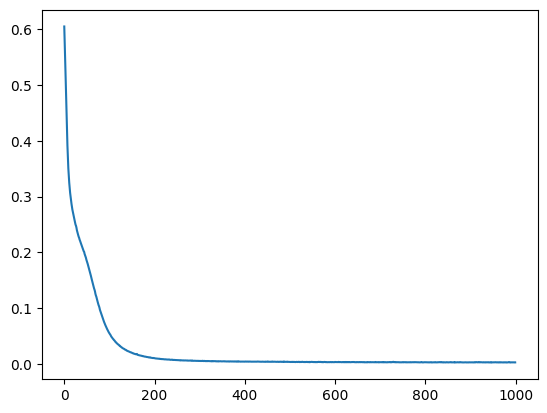

In [93]:
plt.plot([i for i in range(epochs)], history.history['loss'])

32/32 [==============================] - 0s 581us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

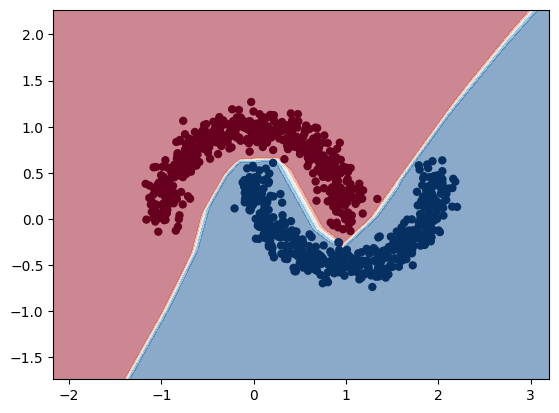

In [94]:
utills.plot_decision_boundary(X, y, model, cmap='RdBu')

In [95]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 3.5188e-04 - binary_accuracy: 1.0000


[0.00035187735920771956, 1.0]

5/5 [==============================] - 0s 751us/step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

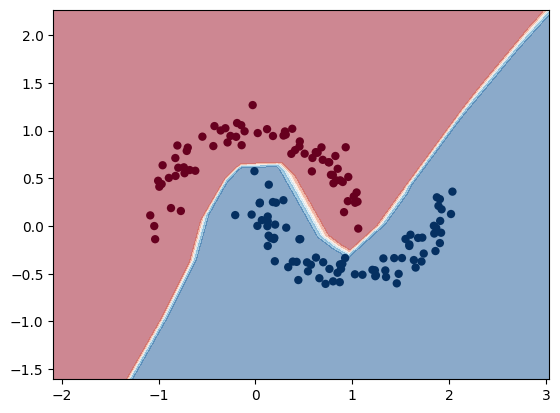

In [96]:
utills.plot_decision_boundary(X_test, y_test, model, cmap='RdBu')